In [1]:
%load_ext autoreload
%autoreload 2
import json
import pandas as pd
import glob
import re
import utils
import itertools

VIOLINPLOT_STYLE = {
    'density_norm':'width', 
    'cut': 0
}

SINGLE_FIG_STYLE = {
    'figsize': (1.618 * 3.125, 3.125)
}

DOUBLE_FIG_STYLE = {
    'figsize': (2 * 1.618 * 3.125, 3.125)
}

In [2]:
instances_available = [re.search(r"../results/(.*)_greedy_200.json", filename).groups()[0] for filename in glob.glob("../results/*_greedy_200.json")]
pd.DataFrame(index=instances_available)

Empty DataFrame
Columns: []
Index: [toy, zib54_9, norway_2, pioro40_2, cost266_4, france_2, janos-us-ca_9, giul39_9, india35_2, france_4, pioro40_9, nobel-eu_2, ta2_2, germany50_9, janos-us-ca_4, pioro40_4, nobel-eu_9, cost266_2, ta2_9, sun_9, cost266_9, giul39_4, india35_9, india35_4, france_9, janos-us-ca_2, zib54_4, norway_9, sun_4, zib54_2, ta2_4, giul39_2, germany50_4, nobel-eu_4, germany50_2, sun_2, norway_4]

In [16]:
greedy_df = pd.DataFrame([utils.get_greedy_stats(instance) for instance in instances_available])
vigp_df = pd.DataFrame([utils.get_vigp_stats(instance) for instance in instances_available])
df = pd.concat([vigp_df, greedy_df])
for topo_type in ['real', 'virtual']:
    df[f'average_demands_{topo_type}'] = df[f'nb_demands_{topo_type}'].apply(lambda l: sum(l) / len(l) if isinstance(l, list) and len(l) > 0 else 0)
df

instance algorithm  nb_virtual_topologies  nb_real_topologies  \
0           toy      vIGP                      1                   6   
1       zib54_9      vIGP                      9                   8   
2      norway_2      vIGP                      3                   5   
3     pioro40_2      vIGP                      9                  12   
4     cost266_4      vIGP                      1                   2   
..          ...       ...                    ...                 ...   
32  germany50_4    Greedy                      0                   9   
33   nobel-eu_4    Greedy                      0                   1   
34  germany50_2    Greedy                      0                   9   
35        sun_2    Greedy                      0                   7   
36     norway_4    Greedy                      0                   5   

    nb_total_topologies  execution_time  vigp_time  \
0                     7        0.278842   0.012976   
1                    17      155.567672  11.742800   
2                     8       21.324783   0.137158   
3                    21      136.992976   1.847440   
4                     3       15.211914   0.374182   
..                  ...             ...        ...   
32                    9      189.632973        NaN   
33                    1        1.896481        NaN   
34                    9      186.969407        NaN   
35                    7       30.745669        NaN   
36                    5       22.097282        NaN   

                     nb_demands_virtual  \
0                                  [24]   
1   [37, 15, 85, 186, 32, 30, 4, 4, 10]   
2                           [16, 4, 12]   
3      [80, 32, 56, 14, 10, 8, 8, 4, 2]   
4                                  [30]   
..                                  ...   
32                                  NaN   
33                                  NaN   
34                                  NaN   
35                                  NaN   
36                                  NaN   

                            nb_demands_real  average_demands_real  \
0                        [2, 1, 2, 1, 1, 1]              1.333333   
1                [25, 3, 1, 14, 2, 1, 1, 2]              6.125000   
2                           [5, 4, 9, 9, 1]              5.600000   
3   [13, 1, 17, 3, 4, 10, 9, 1, 1, 1, 1, 1]              5.166667   
4                                    [1, 1]              1.000000   
..                                      ...                   ...   
32         [163, 33, 15, 5, 1, 45, 8, 2, 2]             30.444444   
33                                     [12]             12.000000   
34         [163, 33, 15, 5, 1, 45, 8, 2, 2]             30.444444   
35               [101, 14, 25, 13, 1, 1, 1]             22.285714   
36                       [23, 6, 18, 12, 1]             12.000000   

    average_demands_virtual  
0                 24.000000  
1                 44.777778  
2                 10.666667  
3                 23.777778  
4                 30.000000  
..                      ...  
32                 0.000000  
33                 0.000000  
34                 0.000000  
35                 0.000000  
36                 0.000000  

[74 rows x 11 columns]

In [17]:
stats_table = df.pivot_table(columns='algorithm', values=['nb_virtual_topologies', 'nb_real_topologies', 'nb_total_topologies', 'execution_time', 'vigp_time', 'average_demands_real', 'average_demands_virtual'], index='instance').query('instance != "toy"')
stats_table

average_demands_real            average_demands_virtual  \
algorithm                   Greedy       vIGP                  Greedy   
instance                                                                
cost266_2                 4.571429   1.000000                     0.0   
cost266_4                 4.571429   1.000000                     0.0   
cost266_9                 4.571429   1.000000                     0.0   
france_2                  3.333333   1.500000                     0.0   
france_4                  3.333333   1.500000                     0.0   
france_9                  3.333333   1.500000                     0.0   
germany50_2              30.444444   5.000000                     0.0   
germany50_4              30.444444   5.000000                     0.0   
germany50_9              30.444444   5.000000                     0.0   
giul39_2                 21.076923  12.750000                     0.0   
giul39_4                 21.076923  12.750000                     0.0   
giul39_9                 21.076923  12.750000                     0.0   
india35_2                 5.714286   1.333333                     0.0   
india35_4                 5.714286   1.333333                     0.0   
india35_9                 5.714286   1.333333                     0.0   
janos-us-ca_2             5.000000   4.000000                     0.0   
janos-us-ca_4             5.000000   4.000000                     0.0   
janos-us-ca_9             5.000000   4.000000                     0.0   
nobel-eu_2               12.000000   0.000000                     0.0   
nobel-eu_4               12.000000   0.000000                     0.0   
nobel-eu_9               12.000000   0.000000                     0.0   
norway_2                 12.000000   5.600000                     0.0   
norway_4                 12.000000   5.600000                     0.0   
norway_9                 12.000000   5.600000                     0.0   
pioro40_2                21.230769   5.166667                     0.0   
pioro40_4                21.230769   5.166667                     0.0   
pioro40_9                21.230769   5.166667                     0.0   
sun_2                    22.285714   8.800000                     0.0   
sun_4                    22.285714   8.800000                     0.0   
sun_9                    22.285714   8.800000                     0.0   
ta2_2                    49.500000   6.363636                     0.0   
ta2_4                    49.500000   6.363636                     0.0   
ta2_9                    49.500000   6.363636                     0.0   
zib54_2                  37.666667   6.125000                     0.0   
zib54_4                  37.666667   6.125000                     0.0   
zib54_9                  37.666667   6.125000                     0.0   

                          execution_time             nb_real_topologies       \
algorithm            vIGP         Greedy        vIGP             Greedy vIGP   
instance                                                                       
cost266_2       30.000000      48.105944   15.903579                  7    2   
cost266_4       30.000000      46.860643   15.211914                  7    2   
cost266_9       30.000000      49.364375   15.086771                  7    2   
france_2         7.000000      10.123589    7.582157                  3    2   
france_4         7.000000       6.665486    4.461218                  3    2   
france_9         7.000000      10.266920    7.532834                  3    2   
germany50_2     40.666667     186.969407  115.312697                  9    6   
germany50_4     40.666667     189.632973  118.689689                  9    6   
germany50_9     40.666667     196.930574  116.372007                  9    6   
giul39_2        34.400000     166.512498  100.729838                 13    8   
giul39_4        34.400000     170.805808  100.198280                 13    8   
giul39_9        34.400000     169.645091  102.

MTR  vMTR (real)  vMTR (virtual)
count  36.000000    36.000000       36.000000
mean    8.500000     5.416667        4.083333
std     5.113009     3.620379        2.970089
min     1.000000     0.000000        1.000000
25%     5.500000     2.750000        1.000000
50%     7.000000     5.000000        3.000000
75%    12.250000     8.000000        6.250000
max    20.000000    12.000000        9.000000

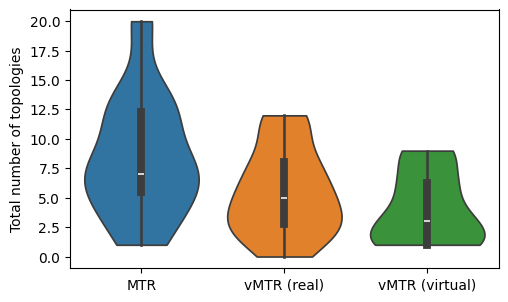

In [5]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn 
import tikzplotlib

fig, ax = plt.subplots(**SINGLE_FIG_STYLE)
data = pd.concat([stats_table['nb_real_topologies'], stats_table['nb_virtual_topologies']['vIGP']])
data.columns = ['MTR', 'vMTR (real)', 'vMTR (virtual)']
seaborn.violinplot(data, ax=ax, **VIOLINPLOT_STYLE)
ax.set_ylabel("Total number of topologies")
display(data.describe())
fig.tight_layout()

to_remove = [child for child in ax.get_children() if isinstance(child, matplotlib.collections.PathCollection)]
for child in to_remove:
    child.remove()
    
tikzplotlib.save("nb_topologies.tex", standalone=True)


MTR  vMTR (real)  vMTR (virtual)
count  36.000000    36.000000       36.000000
mean   18.568630     4.803220       32.670899
std    14.293838     3.528397       32.968742
min     3.333333     0.000000        7.000000
25%     5.535714     1.458333       11.666667
50%    16.538462     5.083333       26.888889
75%    24.325397     6.184659       38.166667
max    49.500000    12.750000      131.428571

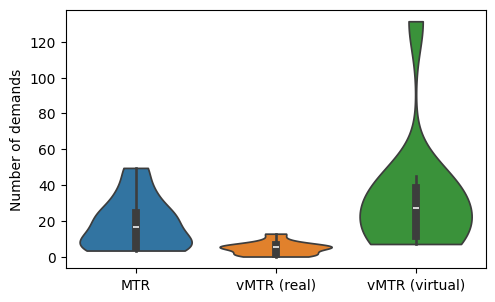

In [6]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn 
import tikzplotlib


data = pd.concat([stats_table['average_demands_real'], stats_table['average_demands_virtual']['vIGP']])
data.columns = ['MTR', 'vMTR (real)', 'vMTR (virtual)']

fig, ax = plt.subplots(**SINGLE_FIG_STYLE)
seaborn.violinplot(data, ax=ax, **VIOLINPLOT_STYLE)
ax.set_ylabel("Number of demands")
 
display(data.describe())
fig.tight_layout()

to_remove = [child for child in ax.get_children() if isinstance(child, matplotlib.collections.PathCollection)]
for child in to_remove:
    child.remove()
    
tikzplotlib.save("average_demands_per_topo.tex", standalone=True)


MTR  vMTR (greedy)  vMTR (lambda)
count   36.000000      36.000000      36.000000
mean   134.016254      86.283388       4.134753
std    185.205136     112.044950       8.428490
min      2.829474       0.053029       0.014685
25%     21.042372      15.730663       0.128912
50%     55.597346      28.205729       0.565673
75%    168.271831     123.265511       2.177665
max    695.004179     411.110420      29.818400

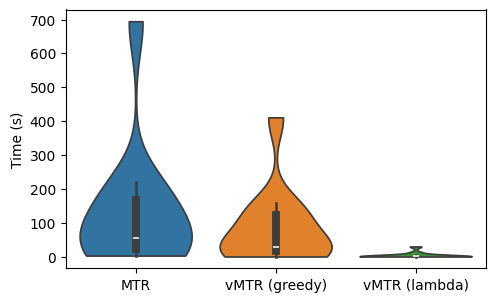

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn 
import tikzplotlib


data = pd.concat([stats_table['execution_time'], stats_table['vigp_time']['vIGP']])
data.columns = ['MTR', 'vMTR (greedy)', 'vMTR (lambda)']

fig, ax = plt.subplots(**SINGLE_FIG_STYLE)
seaborn.violinplot(data, ax=ax, **VIOLINPLOT_STYLE)
ax.set_ylabel("Time (s)")
display(data.describe())
fig.tight_layout()

to_remove = [child for child in ax.get_children() if isinstance(child, matplotlib.collections.PathCollection)]
for child in to_remove:
    child.remove()
    
tikzplotlib.save("execution_time.tex", standalone=True)

In [8]:
all_results_df = pd.concat([utils.compare_paths(instance, utils.load_demand_graph(f'../json/{instance}_wdm.json'), {'vIGP': utils.get_vipged_path(instance, 'lambdaMin'),
                                                           'Greedy': utils.get_paths_from_greedy(instance, utils.load_demand_graph(f"../json/{instance}_wdm.json"), "greedy_200")}) for instance in instances_available]).query("instance != 'toy'")
qos_df = pd.concat([pd.DataFrame(data=[(instance, demand_property['id'], demand_property['delay'], demand_property['loss']) for u, v, demand_property in utils.load_demand_graph(f'../json/{instance}_wdm.json').edges(data=True)], columns=['instance', 'demand_id', 'delay', 'loss']) for instance in instances_available]).query("instance != 'toy'")

In [9]:
path_table = all_results_df.pivot(index=['instance', 'demand_id'], values=['delay', 'loss', 'topo_id'], columns=['algo']).dropna()
qos_table = qos_df.pivot(index=['instance', 'demand_id'], values=['delay', 'loss'], columns=[]).dropna()
for algo, qos in itertools.product(['Greedy', 'vIGP', ], ['delay', 'loss']):
    path_table[(f'{qos}_ratio', algo)] =  1 - (qos_table[qos] - path_table[qos][algo]) / qos_table[qos]
path_table

delay                loss          topo_id       \
algo                    Greedy       vIGP   Greedy     vIGP  Greedy vIGP   
instance  demand_id                                                        
cost266_2 0           415710.0   415710.0   3362.0   3362.0       6   v0   
          1           456300.0   456300.0   3800.0   3800.0       6   v0   
          2           394200.0   394200.0   3165.0   3165.0       6   v0   
          3           347940.0   347940.0   2802.0   2802.0       6   v0   
          4           445140.0   432180.0   3748.0   3756.0       6   v0   
...                        ...        ...      ...      ...     ...  ...   
zib54_9   447         619156.8   619156.8  41980.0  41980.0      11   v5   
          448        2034370.9   530705.9  37926.0  35272.0      11   v2   
          449        1385731.0  1385731.0  17268.0  17268.0      11   v3   
          450        3051558.0  3051558.0  50270.0  50270.0      11   v3   
          451        3066300.0  3257942.0  55900.0  61714.0      11    7   

                    delay_ratio loss_ratio delay_ratio loss_ratio  
algo                     Greedy     Greedy        vIGP       vIGP  
instance  demand_id                                                
cost266_2 0            0.989929   0.970554    0.989929   0.970554  
          1            0.990817    0.97386    0.990817    0.97386  
          2            0.989386   0.968779    0.989386   0.968779  
          3            0.987992   0.968545    0.987992   0.968545  
          4            0.955382   0.998136    0.927566   1.000266  
...                         ...        ...         ...        ...  
zib54_9   447          0.251498   0.961873    0.251498   0.961873  
          448          0.857144   0.786618    0.223603   0.731572  
          449           0.80342   0.441355     0.80342   0.441355  
          450          0.848362   0.680538    0.848362   0.680538  
          451          0.848979   0.882051     0.90204   0.973791  

[7716 rows x 10 columns]

algo
Greedy    0.848647
vIGP      0.751779
dtype: float64

algo
Greedy    0.878225
vIGP      0.858603
dtype: float64

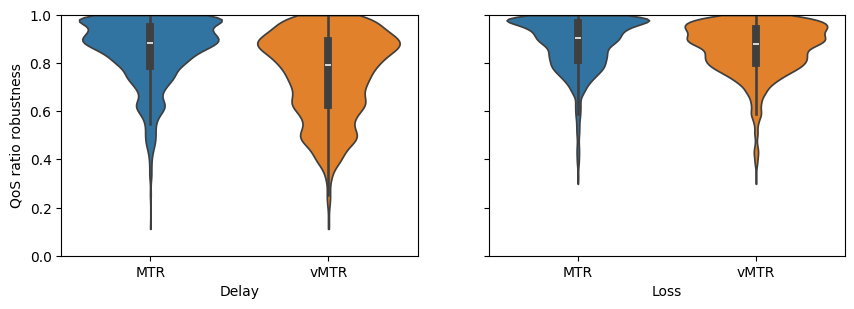

In [10]:
import seaborn
nrows = 1
fig, axes = plt.subplots(ncols=2, nrows=nrows, sharey=True, **DOUBLE_FIG_STYLE)
tikzplotlib.clean_figure(fig)
axes[0].set_ylim(0, 1)
axes[0].set_ylabel("QoS ratio robustness")

data = path_table['delay_ratio']
data.columns = ['MTR', 'vMTR']
seaborn.violinplot(data, ax=axes[0], **VIOLINPLOT_STYLE)
axes[0].set_xlabel('Delay')

data = path_table['loss_ratio']
data.columns = ['MTR', 'vMTR']
seaborn.violinplot(data, ax=axes[1], **VIOLINPLOT_STYLE)
axes[1].set_xlabel('Loss')

display(path_table['delay_ratio'].mean())
display(path_table['loss_ratio'].mean())

for ax in axes:
    to_remove = [child for child in ax.get_children() if isinstance(child, matplotlib.collections.PathCollection)]
    for child in to_remove:
        child.remove()

import tikzplotlib
tikzplotlib.save("qos-robustness.tex", figure=fig, standalone=True)

<Axes: ylabel='max_label'>

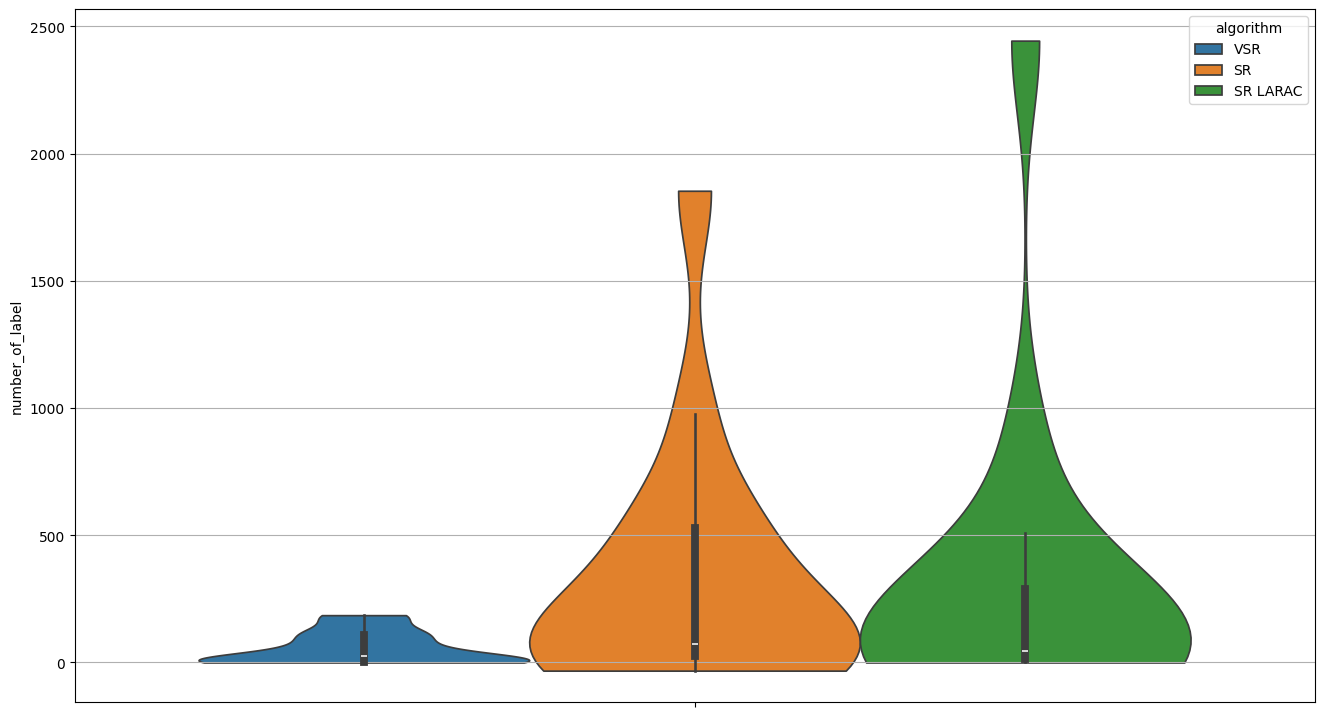

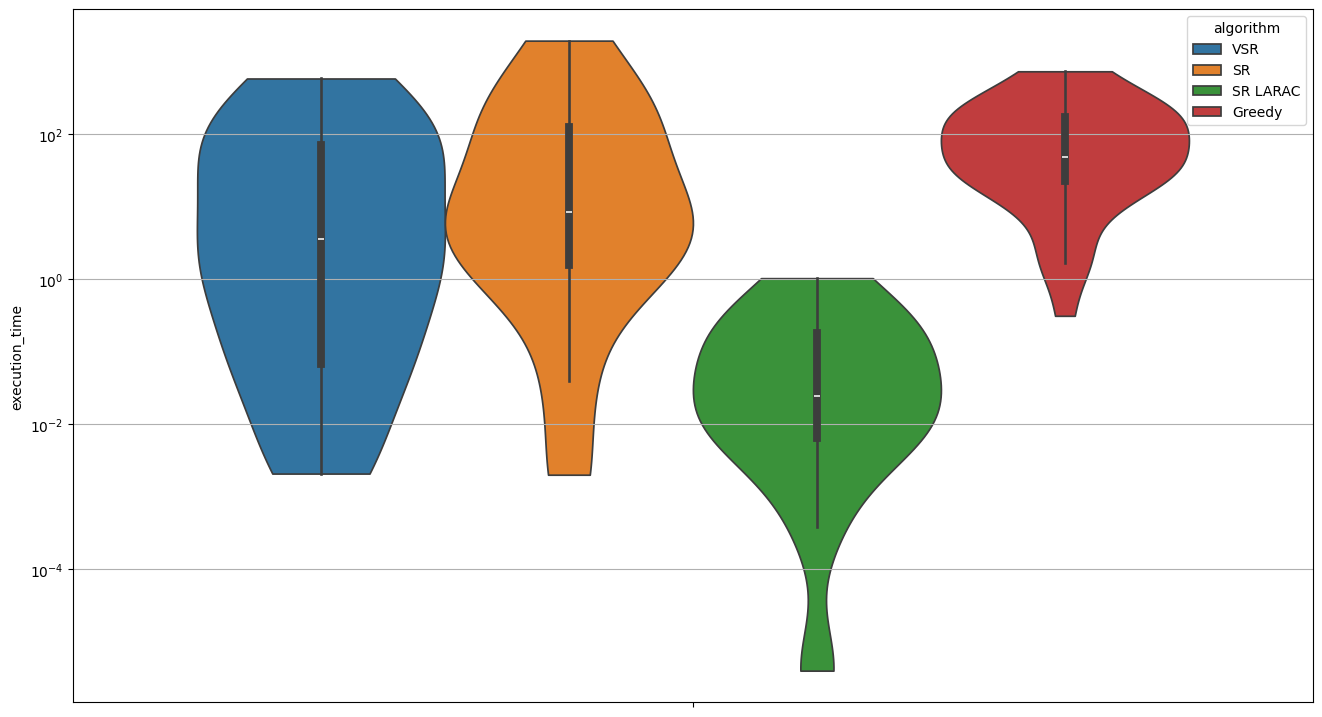

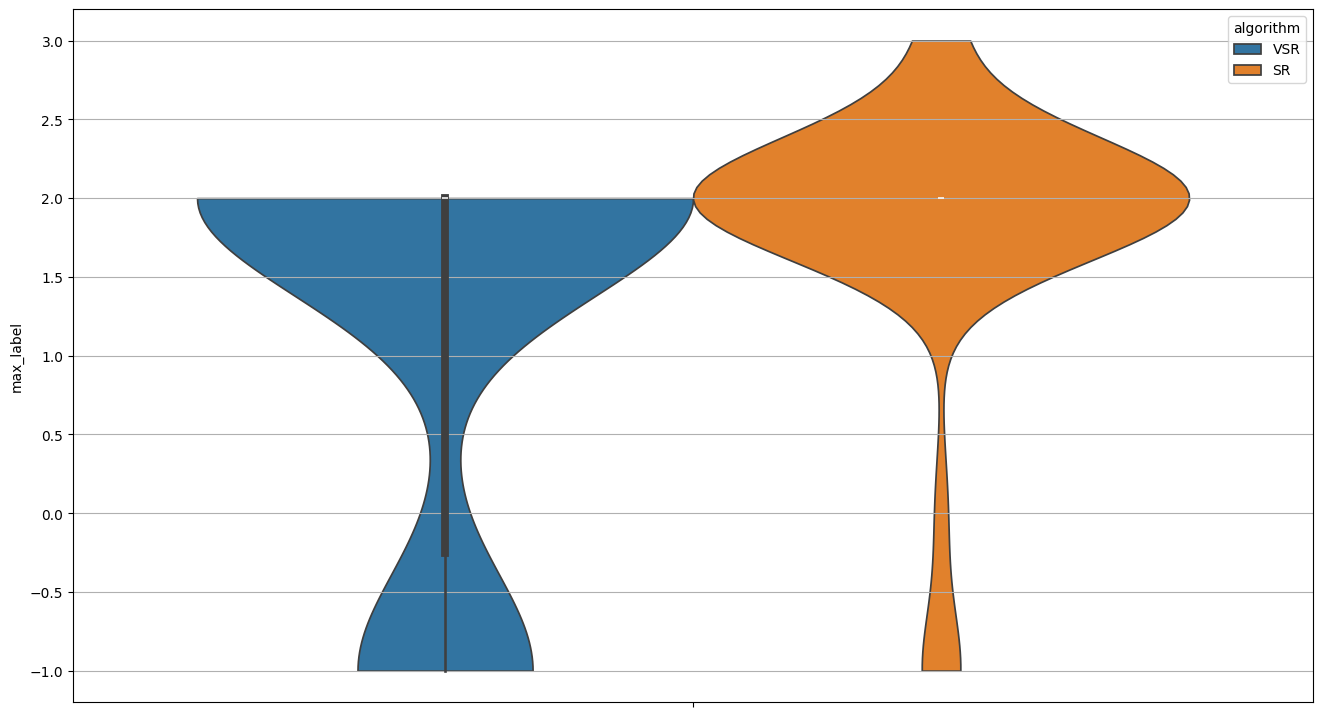

In [23]:
import seaborn as sns

sr_df = pd.read_csv("../results/sr.csv")
sr_df['algorithm'] = "SR"

vsr_df = pd.read_csv("../results/vsr.csv")
vsr_df['algorithm'] = "VSR"

sr_larac_df = pd.read_csv("../results/sr_larac.csv")
sr_larac_df['algorithm'] = "SR LARAC"

fig, ax = plt.subplots(figsize=(16, 9))
ax.grid()
sns.violinplot(pd.concat([vsr_df, sr_df, sr_larac_df]), y='number_of_label', hue='algorithm', **{'density_norm':'width', 'cut': 0}, ax=ax)

fig, ax = plt.subplots(figsize=(16, 9))
ax.grid()
ax.set_yscale('log')
sns.violinplot(pd.concat([vsr_df, sr_df, sr_larac_df, greedy_df]), y='execution_time', hue='algorithm', **{'density_norm':'width', 'cut': 0}, ax=ax)

fig, ax = plt.subplots(figsize=(16, 9))
ax.grid()
sns.violinplot(pd.concat([vsr_df, sr_df]), y='max_label', hue='algorithm', **{'density_norm':'width', 'cut': 0}, ax=ax)